# Global Power Plant Database

Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv(r"C:\Users\chaud\Downloads\database_IND.csv")
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,1.52800,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,5.03600,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,0.21500,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [32]:
df.shape

(907, 27)

In [33]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

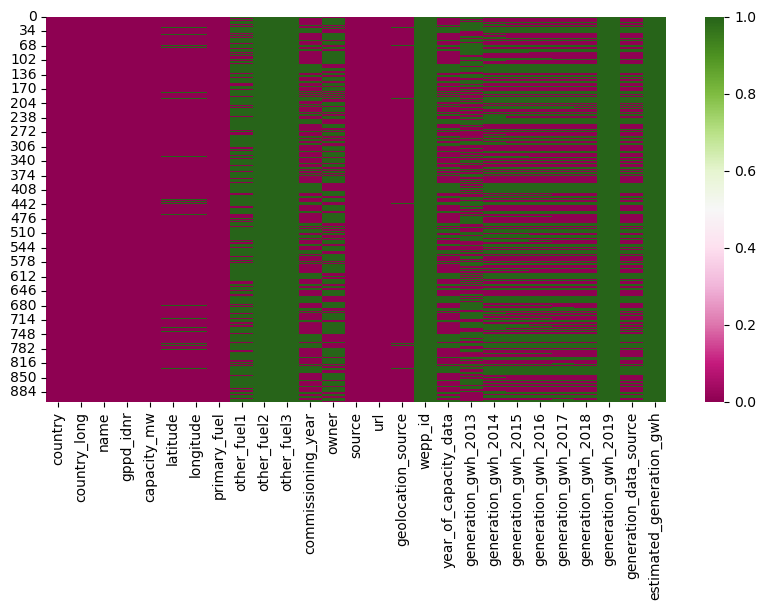

In [34]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cmap="PiYG")
plt.show()

In [35]:
percent_missing_data = df.isnull().sum() * 100 / len(df)
percent_missing_data.sort_values(ascending = False, inplace=True)


In [36]:
pd.DataFrame({'percent missing data': percent_missing_data})

,percent missing data
estimated_generation_gwh,100.000000
other_fuel3,100.000000
wepp_id,100.000000
other_fuel2,99.889746
generation_gwh_2019,99.889746
other_fuel1,78.169791
owner,62.072767
generation_gwh_2014,55.457552
generation_gwh_2015,52.811466
generation_gwh_2016,51.488423


### Observations

If we check from above calculations here are lot of columns with empty data and null values

- Missing Data in Fuel Information:

 Columns 'other_fuel1', 'other_fuel2', and 'other_fuel3' have a significant number of missing values (709, 906, and 907 out 
 of 907, respectively). This suggests that most plants rely solely on the 'primary_fuel' and do not have additional fuel 
 types specified.


- Geolocation Data:

'latitude' and 'longitude' columns have 46 missing values each. This indicates that some power plants lack precise geographical coordinates.


- Commissioning Year:

'commissioning_year' has 380 missing values, implying that information about the commissioning year is unavailable for a substantial number of power plants.


- Ownership Information:

'owner' column has 565 missing values, indicating that ownership data is missing for a significant portion of the power plants.


- Generation Data:

Columns 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' have all values missing (907 out of 907). These columns appear to have no valid data.


- Year of Capacity Data:

'year_of_capacity_data' has 388 missing values, suggesting that the availability of capacity data for specific years is incomplete.


- Generation Data Source and Estimated Generation:

'generation_data_source' has 458 missing values, indicating that the source of generation data is missing for some power plants. 'estimated_generation_gwh' has all values missing (907 out of 907), implying that estimated generation data is not provided.


- Wepp ID and Source Information:

'wepp_id' has all values missing (907 out of 907), indicating it might not be a relevant identifier for this dataset. 'geolocation_source' has 19 missing values, implying that the source of geolocation data is unavailable for a few power plants.


- Generation Years:

Generation data from 'generation_gwh_2014' to 'generation_gwh_2018' has varying levels of missing values, suggesting incomplete or unavailable data for these years.

### Dropping irrevelant columns 

In [37]:
not_usable_columns = [
    'country',
    'country_long',
    'year_of_capacity_data',
    'other_fuel3',
    'wepp_id',
    'generation_gwh_2013',
    'generation_gwh_2019',
    'estimated_generation_gwh',
    'generation_data_source',
    'name',
    'gppd_idnr',
    'url',
    'other_fuel2',
    'owner']

In [38]:
df.drop(columns=not_usable_columns,axis=1, inplace=True)

In [39]:
df.shape

(907, 13)

In [41]:
df.drop(columns=['geolocation_source','other_fuel1'],axis=1,inplace=True)
 

In [42]:
df.shape

(907, 11)

In [45]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [46]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     374
source                   0
generation_gwh_2014    503
generation_gwh_2015    479
generation_gwh_2016    467
generation_gwh_2017    461
generation_gwh_2018    454
dtype: int64

### Filling Null values with Zero

In [48]:
impute_techniques = {
    'latitude': 'mean',
    'longitude': 'mean',
    'commissioning_year': 'median',
    'generation_gwh_2014': 'median',
    'generation_gwh_2015': 'median',
    'generation_gwh_2016': 'median',
    'generation_gwh_2017': 'median',
    'generation_gwh_2018': 'median'
}

# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

df.sample(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
143,2920.0,20.0063,79.2900,Coal,1999.0,Central Electricity Authority,11385.8420,11158.697000,13675.440000,13780.23000,14691.620
154,221.0,23.9070,71.1881,Solar,2001.0,Solar for India,794.5871,697.450781,737.205450,817.97725,798.381
476,600.0,11.7696,77.8138,Coal,2012.0,Central Electricity Authority,2802.3700,3674.160000,3212.700000,2273.06000,2934.690
321,16.0,17.1657,74.2459,Biomass,2001.0,Ym Ssk ltd,794.5871,697.450781,737.205450,817.97725,798.381
643,100.0,22.3404,82.4930,Coal,2014.0,Central Electricity Authority,215.2100,218.930000,344.356238,641.87200,689.008


In [49]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<Axes: >

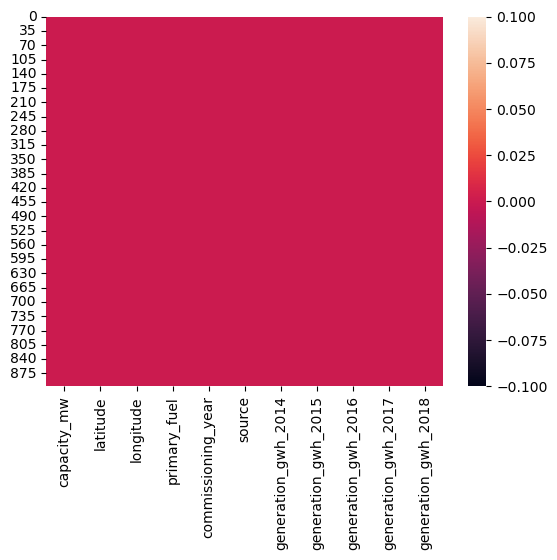

In [52]:
sns.heatmap(df.isnull())

### Checking Statistical features

In [53]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.695700,1514.407736,1504.053054,1568.084625,1660.472080,1695.849524
std,590.085456,6.079148,4.812291,13.259842,2787.544444,2987.567522,3006.290735,3048.417507,3163.784993
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.500000,794.587100,697.450781,737.205450,817.977250,798.381000
50%,59.200000,21.281800,76.979200,2001.000000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2003.500000,794.587100,697.450781,737.205450,817.977250,798.381000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- From the above calculation there is large gap in 75th percentile and max in capacity_mw, generation_gwh_2015 
  generation_gwh_2016 ,generation_gwh_2017 ,generation_gwh_2018 So, the outliers are present.
  
- In each Generation-GWHours columns Mean is greater than Median.

## EDA Process

In [55]:
df['primary_fuel'].value_counts()


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

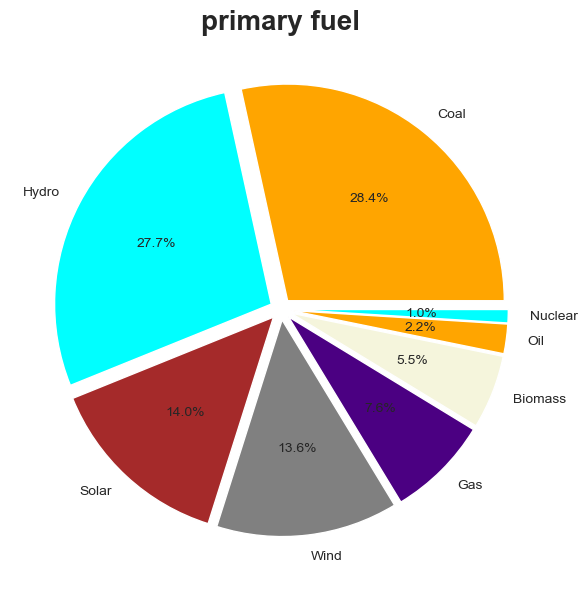

In [99]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
explode = (0.05, 0.05, 0.05, 0.05,0.05 ,0.05 ,0.05, 0.05) 
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige")
df['primary_fuel'].value_counts().plot( 
    kind='pie', autopct='%2.1f%%', 
  colors=colors, explode=explode) 
plt.title('primary fuel', fontsize=20,fontweight ='bold')
plt.ylabel('')
plt.show()

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

Where nuclear power plants are less in percentage

<Axes: xlabel='capacity_mw'>

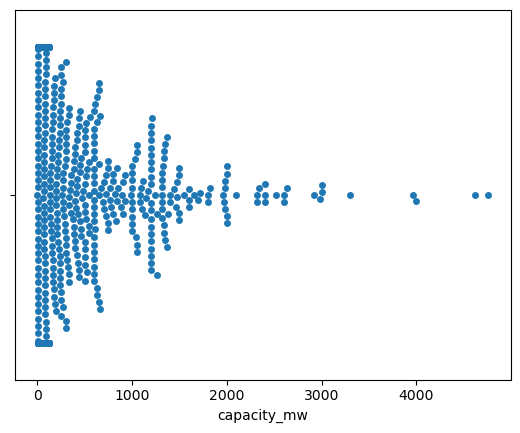

In [70]:
sns.swarmplot(data= df, x='capacity_mw')

#### Checking according to fuel type how much capacity of electricity is generated

In [83]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])


,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


<Figure size 600x600 with 0 Axes>

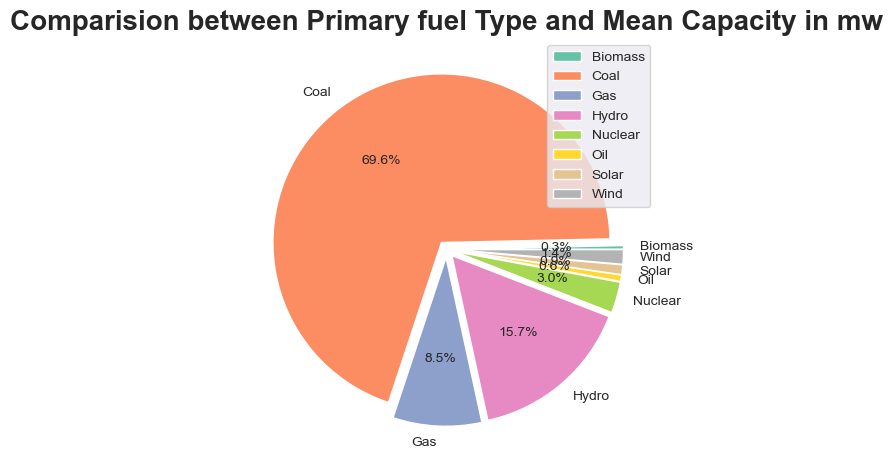

In [110]:
sns.set_palette("Set2")
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
explode = (0.05, 0.05, 0.05, 0.05,0.05 ,0.05 ,0.05, 0.05) 
df.groupby(['primary_fuel']).sum().plot( 
    kind='pie',y ='capacity_mw', autopct='%2.1f%%',
   explode=explode) 
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=20,fontweight ='bold')
plt.ylabel('')
plt.show()

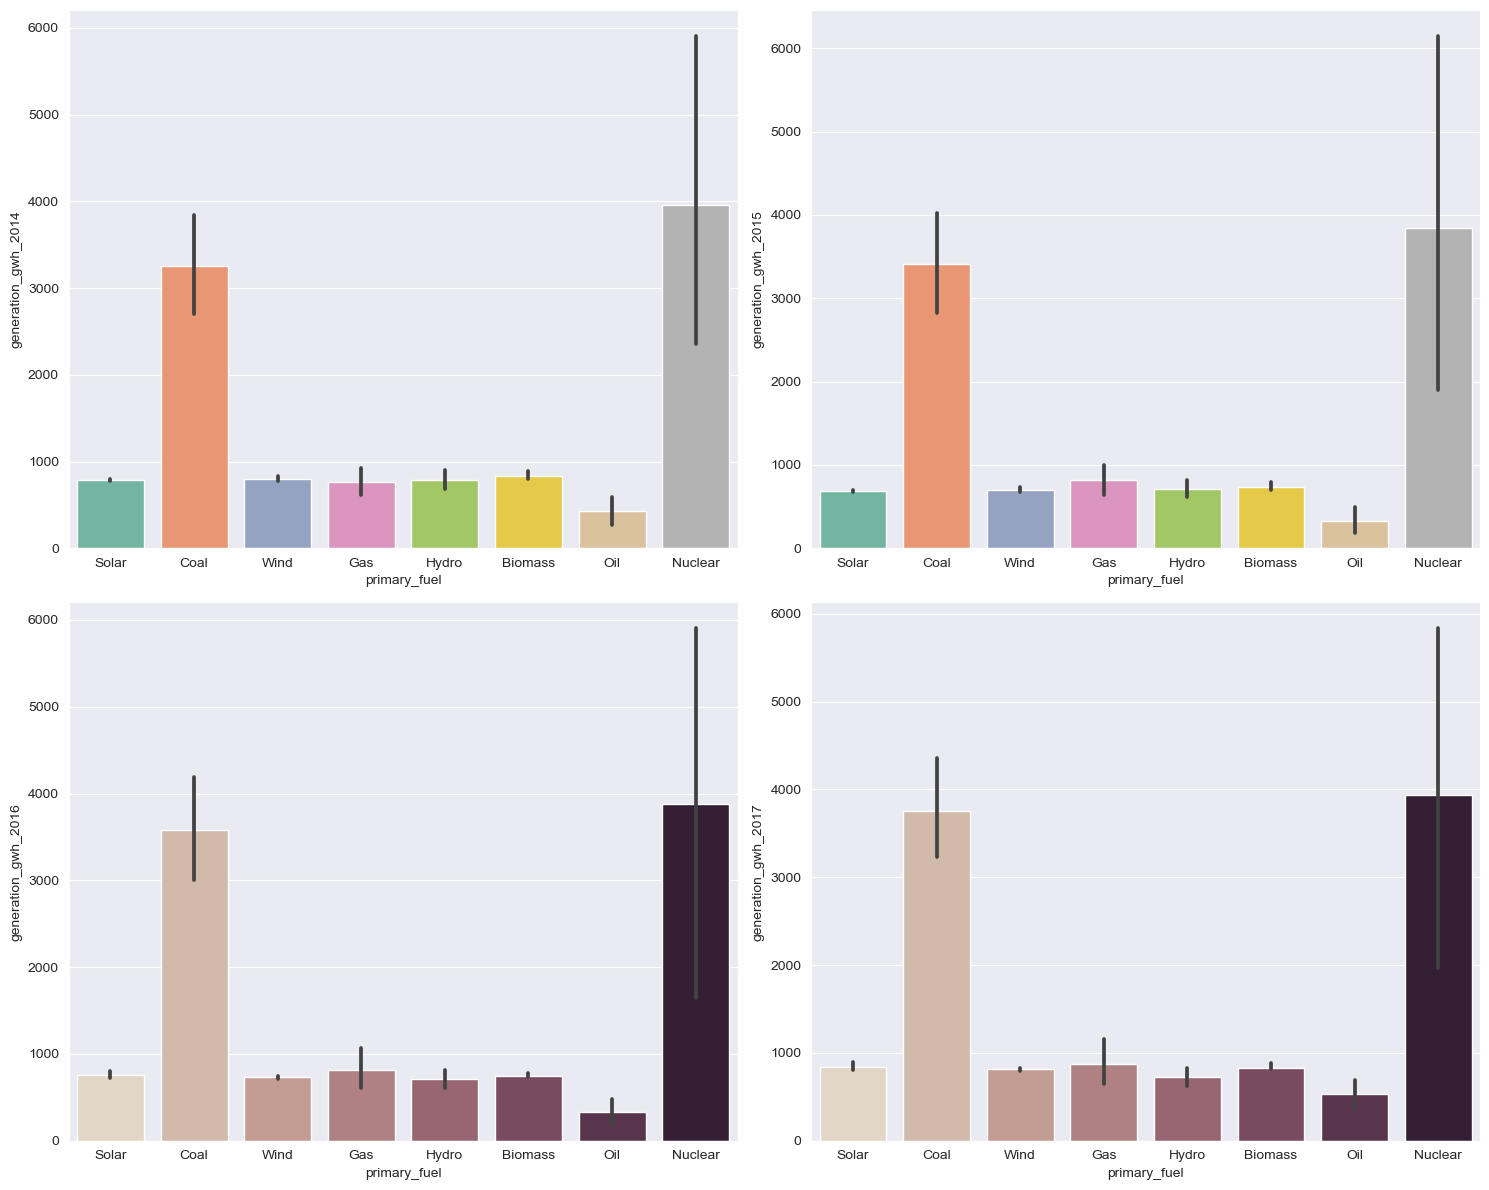

In [119]:
fig,ax=plt.subplots(2,2,figsize=(15,12))

sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=ax[0,0],data=df)


sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=ax[0,1],data=df,palette="Set2")


sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=ax[1,0],data=df,palette="ch:.25")

sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=ax[1,1],data=df,palette="ch:.25")

plt.show()

##### Comment
- Nuclear and coal have high contribution to power generation.
- Other fuel types have very less contribution to power generation.

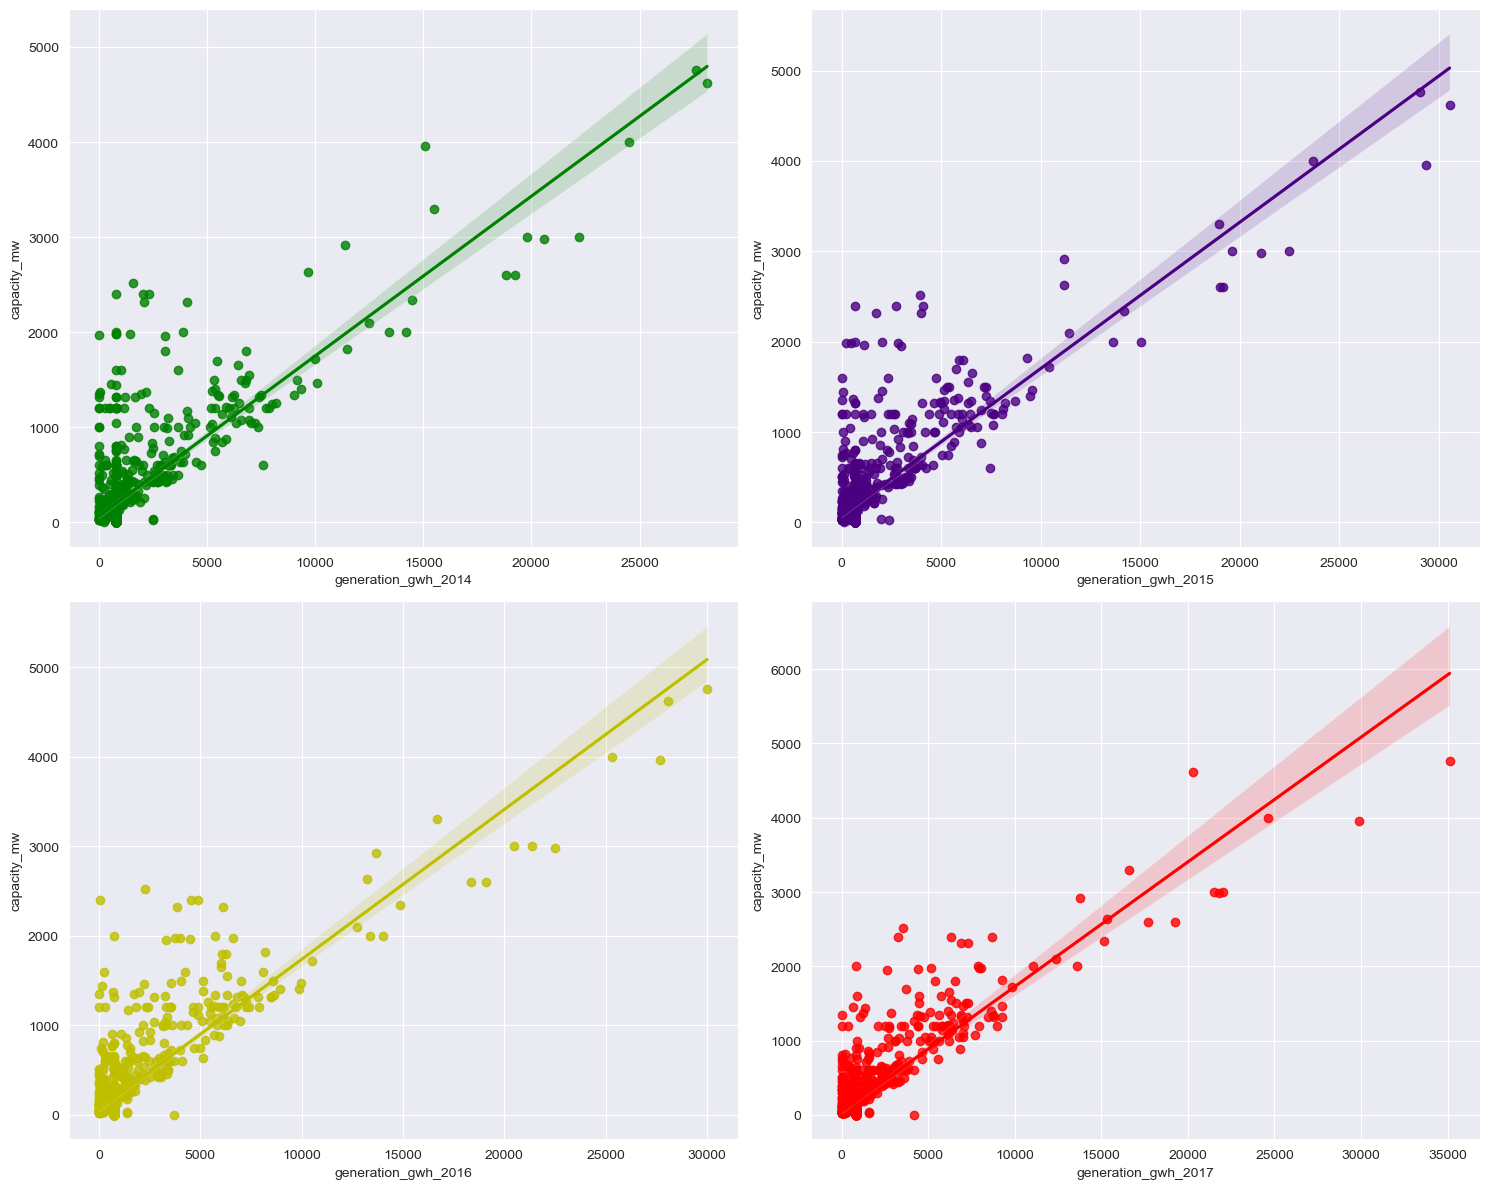

In [127]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.regplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.regplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.regplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="y")

# Checking generation growth in 2017
sns.regplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant also increases.

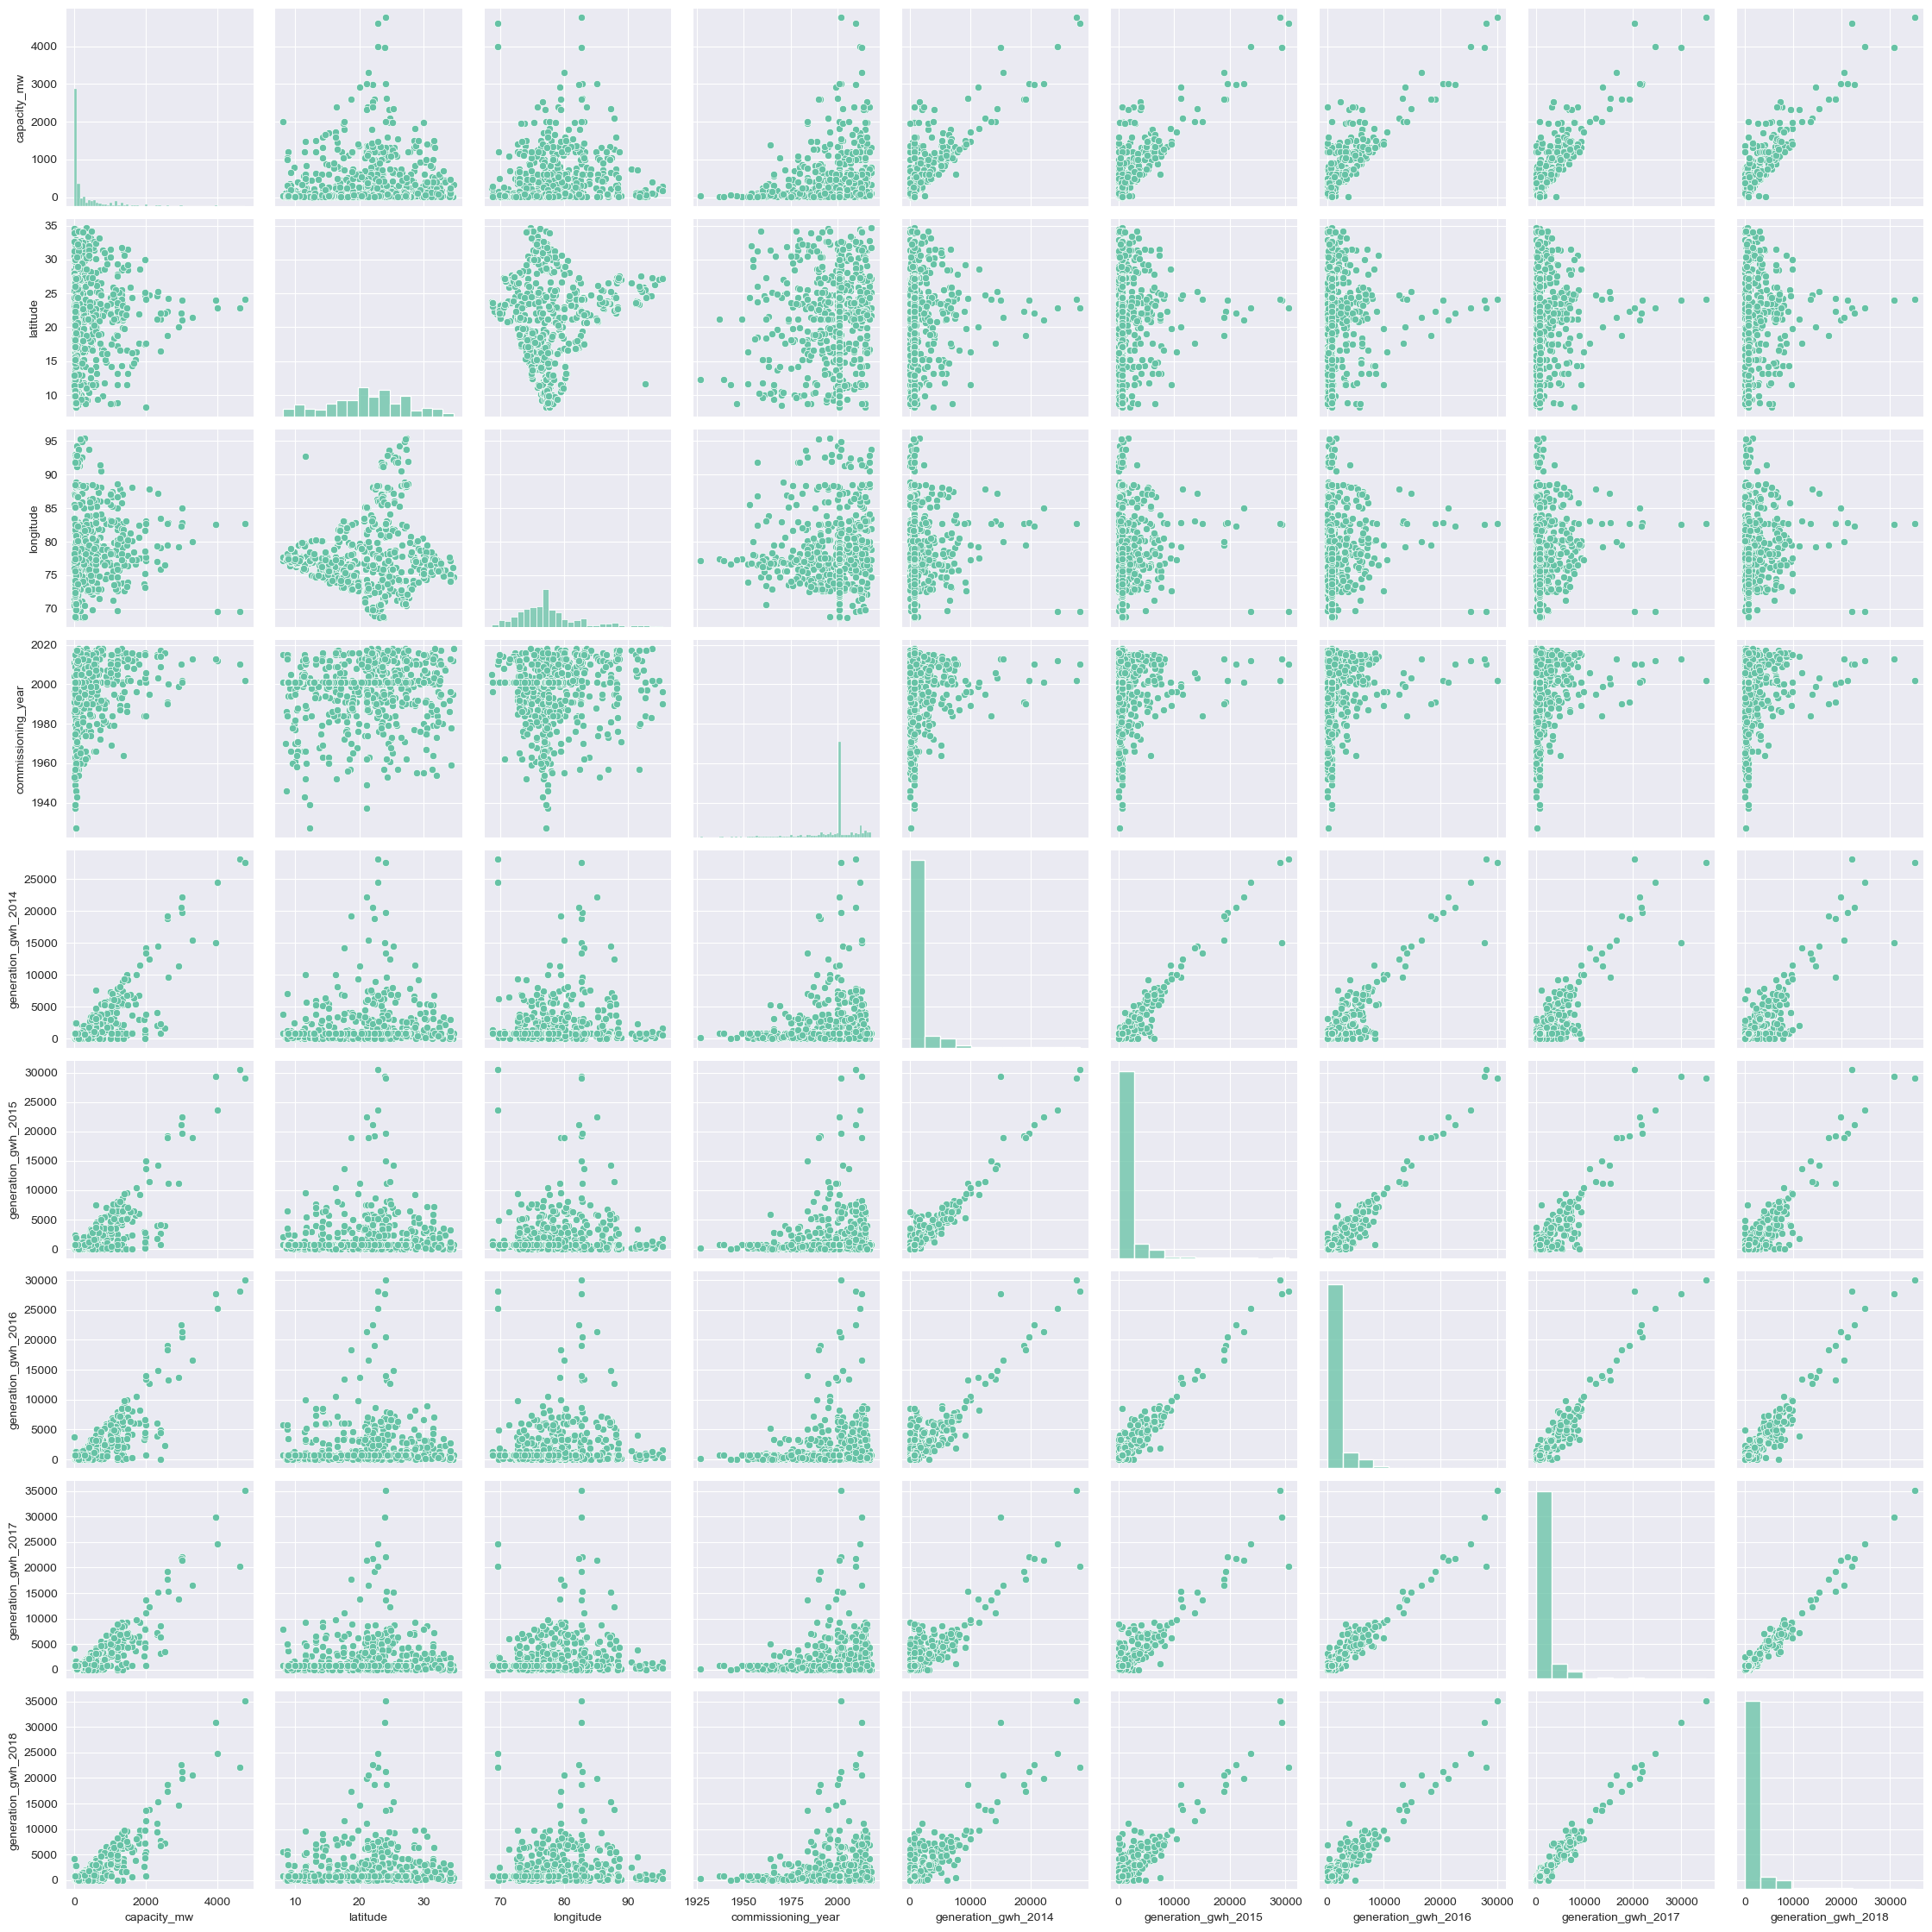

In [131]:
sns.pairplot(df)

In [137]:
category = ['primary_fuel','source']
from sklearn.preprocessing import LabelEncoder
for col in category:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])

In [138]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,794.587100,697.450781,737.205450,817.977250,798.381000
1,98.0,24.7663,74.6090,1,2001.0,174,794.587100,697.450781,737.205450,817.977250,798.381000
2,39.2,21.9038,69.3732,7,2001.0,21,794.587100,697.450781,737.205450,817.977250,798.381000
3,135.0,23.8712,91.3602,2,2004.0,22,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


## Outliers detection and Removal

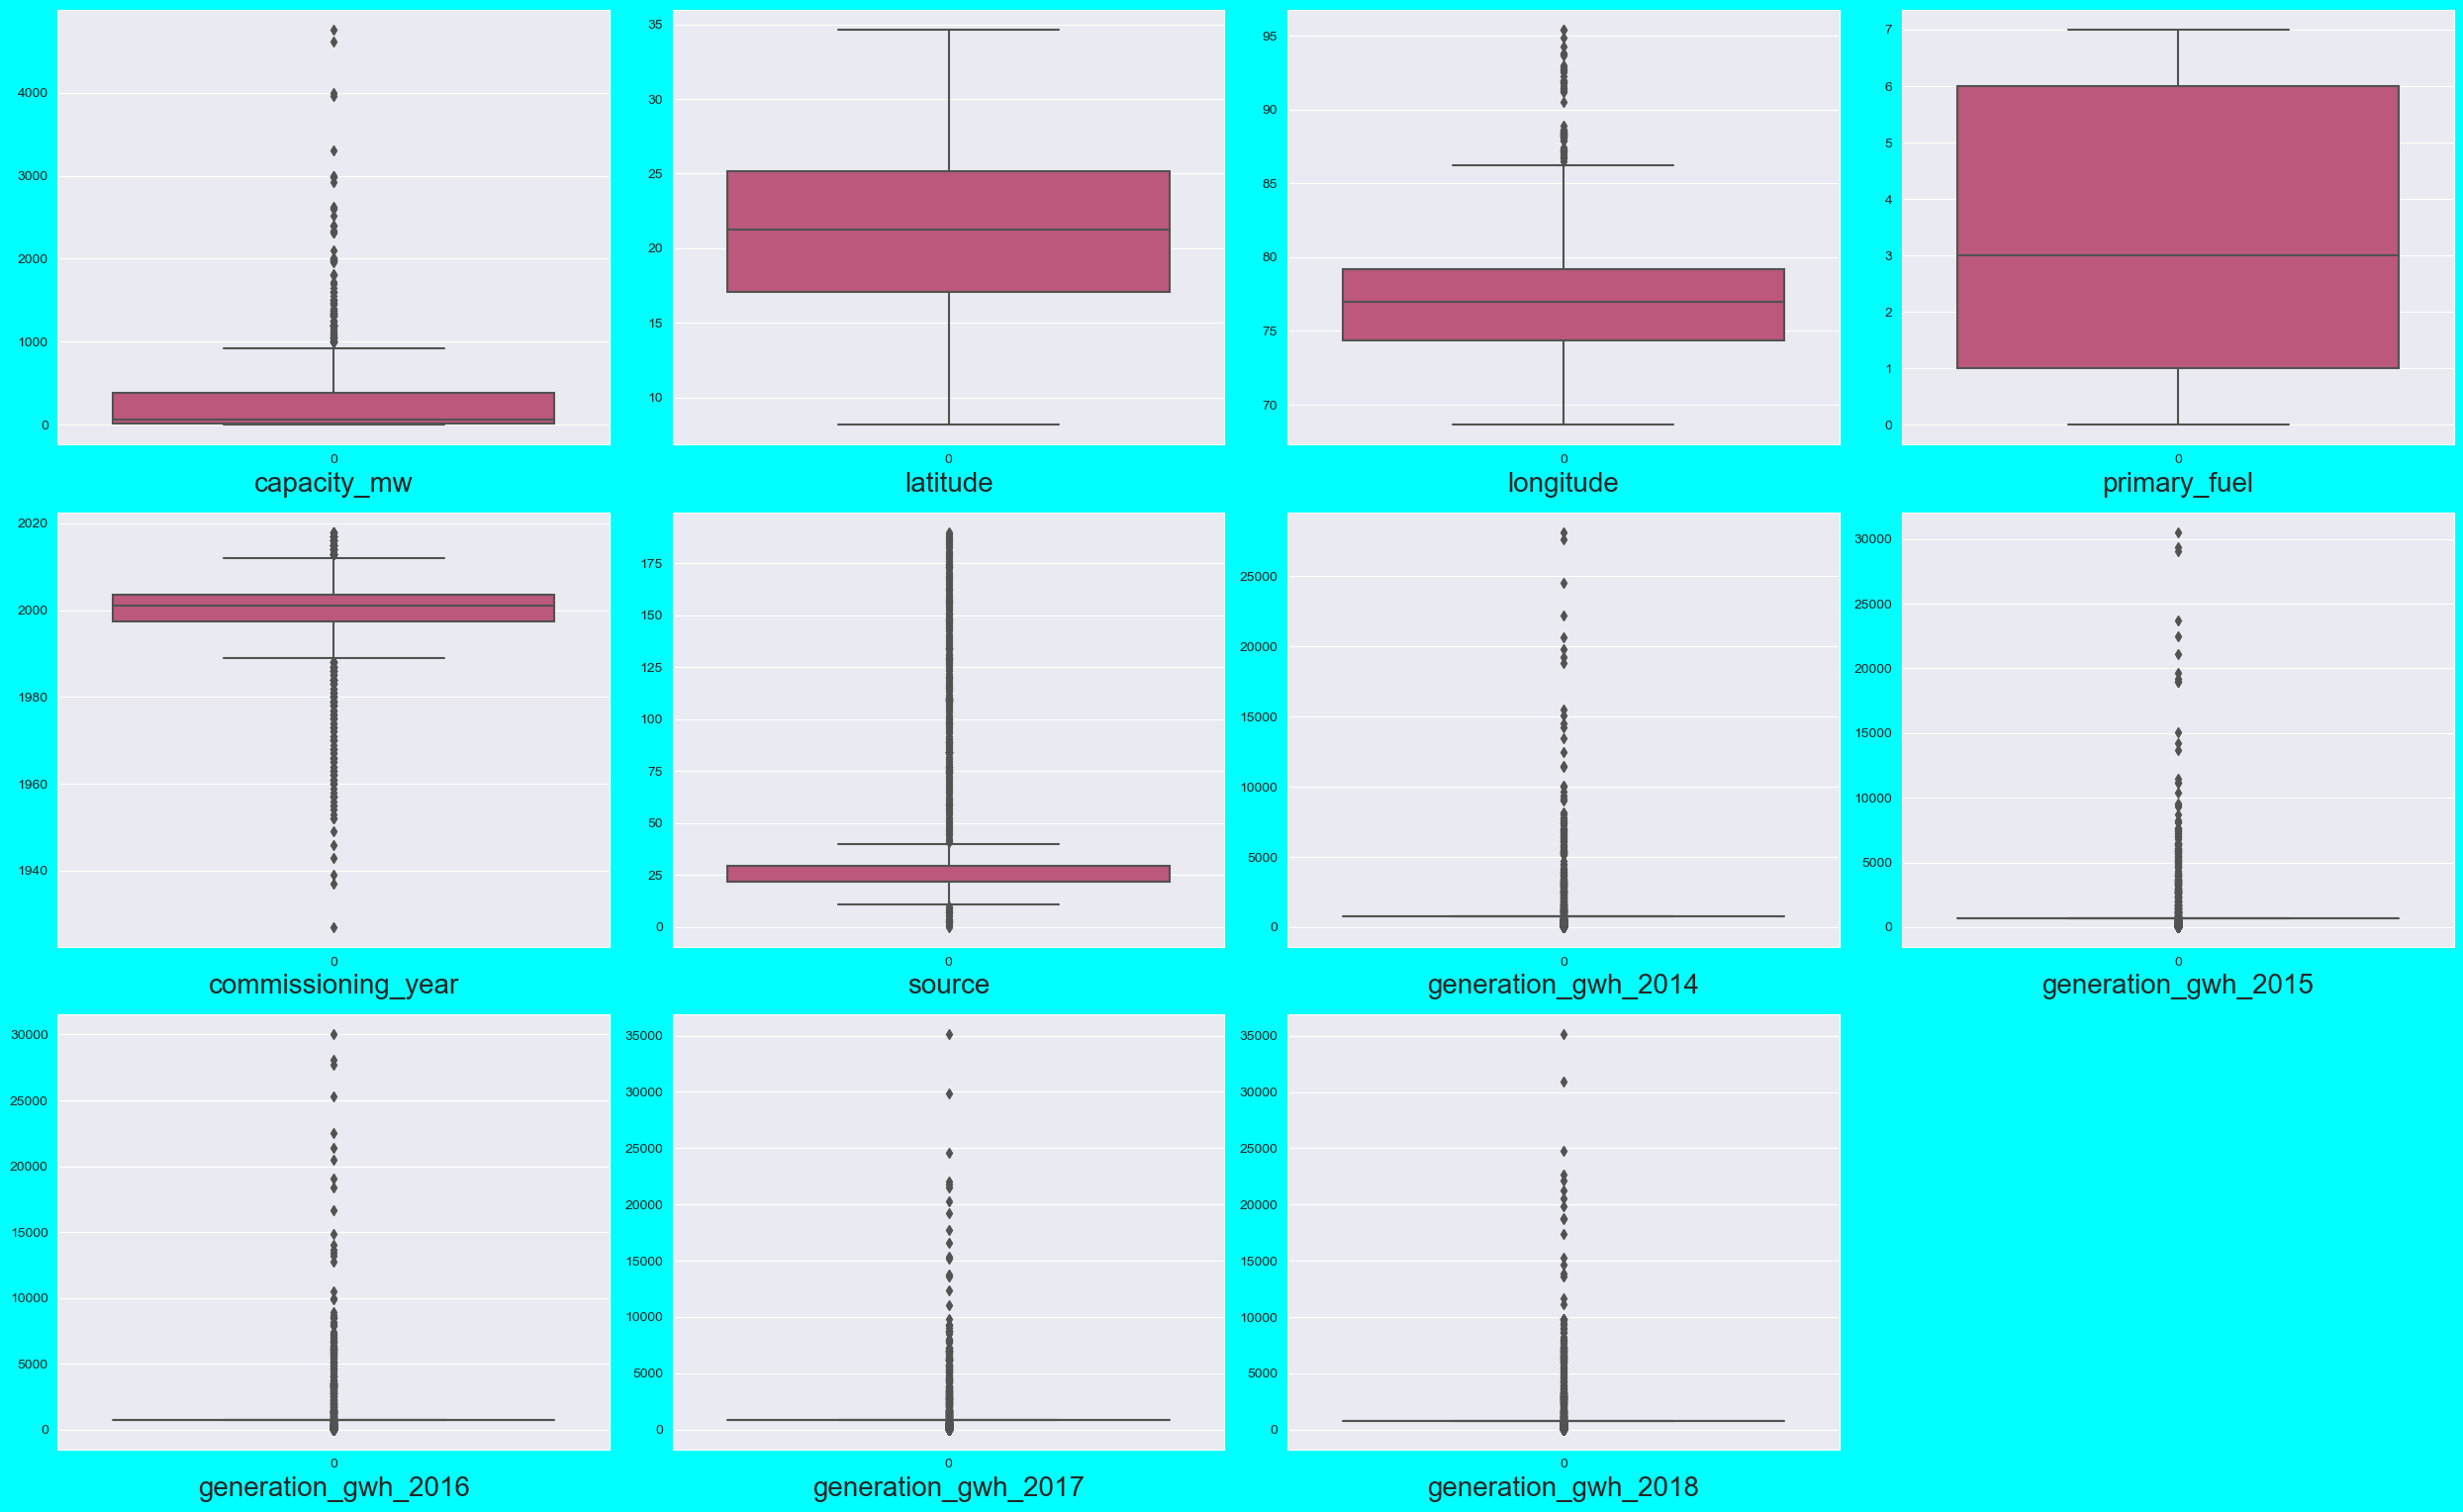

In [141]:
plt.figure(figsize=(25,25), facecolor='cyan')
plot_number=1

for column in df:
    if plot_number <= 20:
        ax=plt.subplot(5,4, plot_number)
        sns.boxplot(df[column],  palette="plasma")
        plt.xlabel(column, fontsize=20)

    plot_number+=1

plt.show()

In [142]:
import scipy.stats as stats
from scipy.stats import zscore
z_scores = stats.zscore(df)  

In [143]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.225688,0.928449,1.460215,0.258370,0.270135,0.276533,0.276524,0.283826
1,0.386977,0.587311,0.593788,0.967877,0.173876,2.917019,0.258370,0.270135,0.276533,0.276524,0.283826
2,0.486679,0.116179,1.682394,1.664401,0.173876,0.512075,0.258370,0.270135,0.276533,0.276524,0.283826
3,0.324240,0.439989,2.889052,0.529164,0.400248,0.489662,0.321829,0.221140,0.227009,0.327136,0.338266
4,2.498942,0.125479,1.027976,0.967877,1.230278,0.489662,0.545994,1.477708,1.555902,1.222655,1.765680
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,1.305736,0.489662,0.258370,0.503382,0.444143,0.260959,0.319208
903,0.548060,1.366853,0.145644,1.225688,0.173876,0.743019,0.258370,0.270135,0.276533,0.276524,0.283826
904,0.509909,0.974707,0.391673,1.664401,0.173876,0.512075,0.258370,0.270135,0.276533,0.276524,0.283826
905,0.417498,0.518793,0.772866,0.967877,0.173876,0.339596,0.258370,0.270135,0.276533,0.276524,0.283826


After outliers are removed there are 907 rows there is some loss of data

### Checking Skewness 

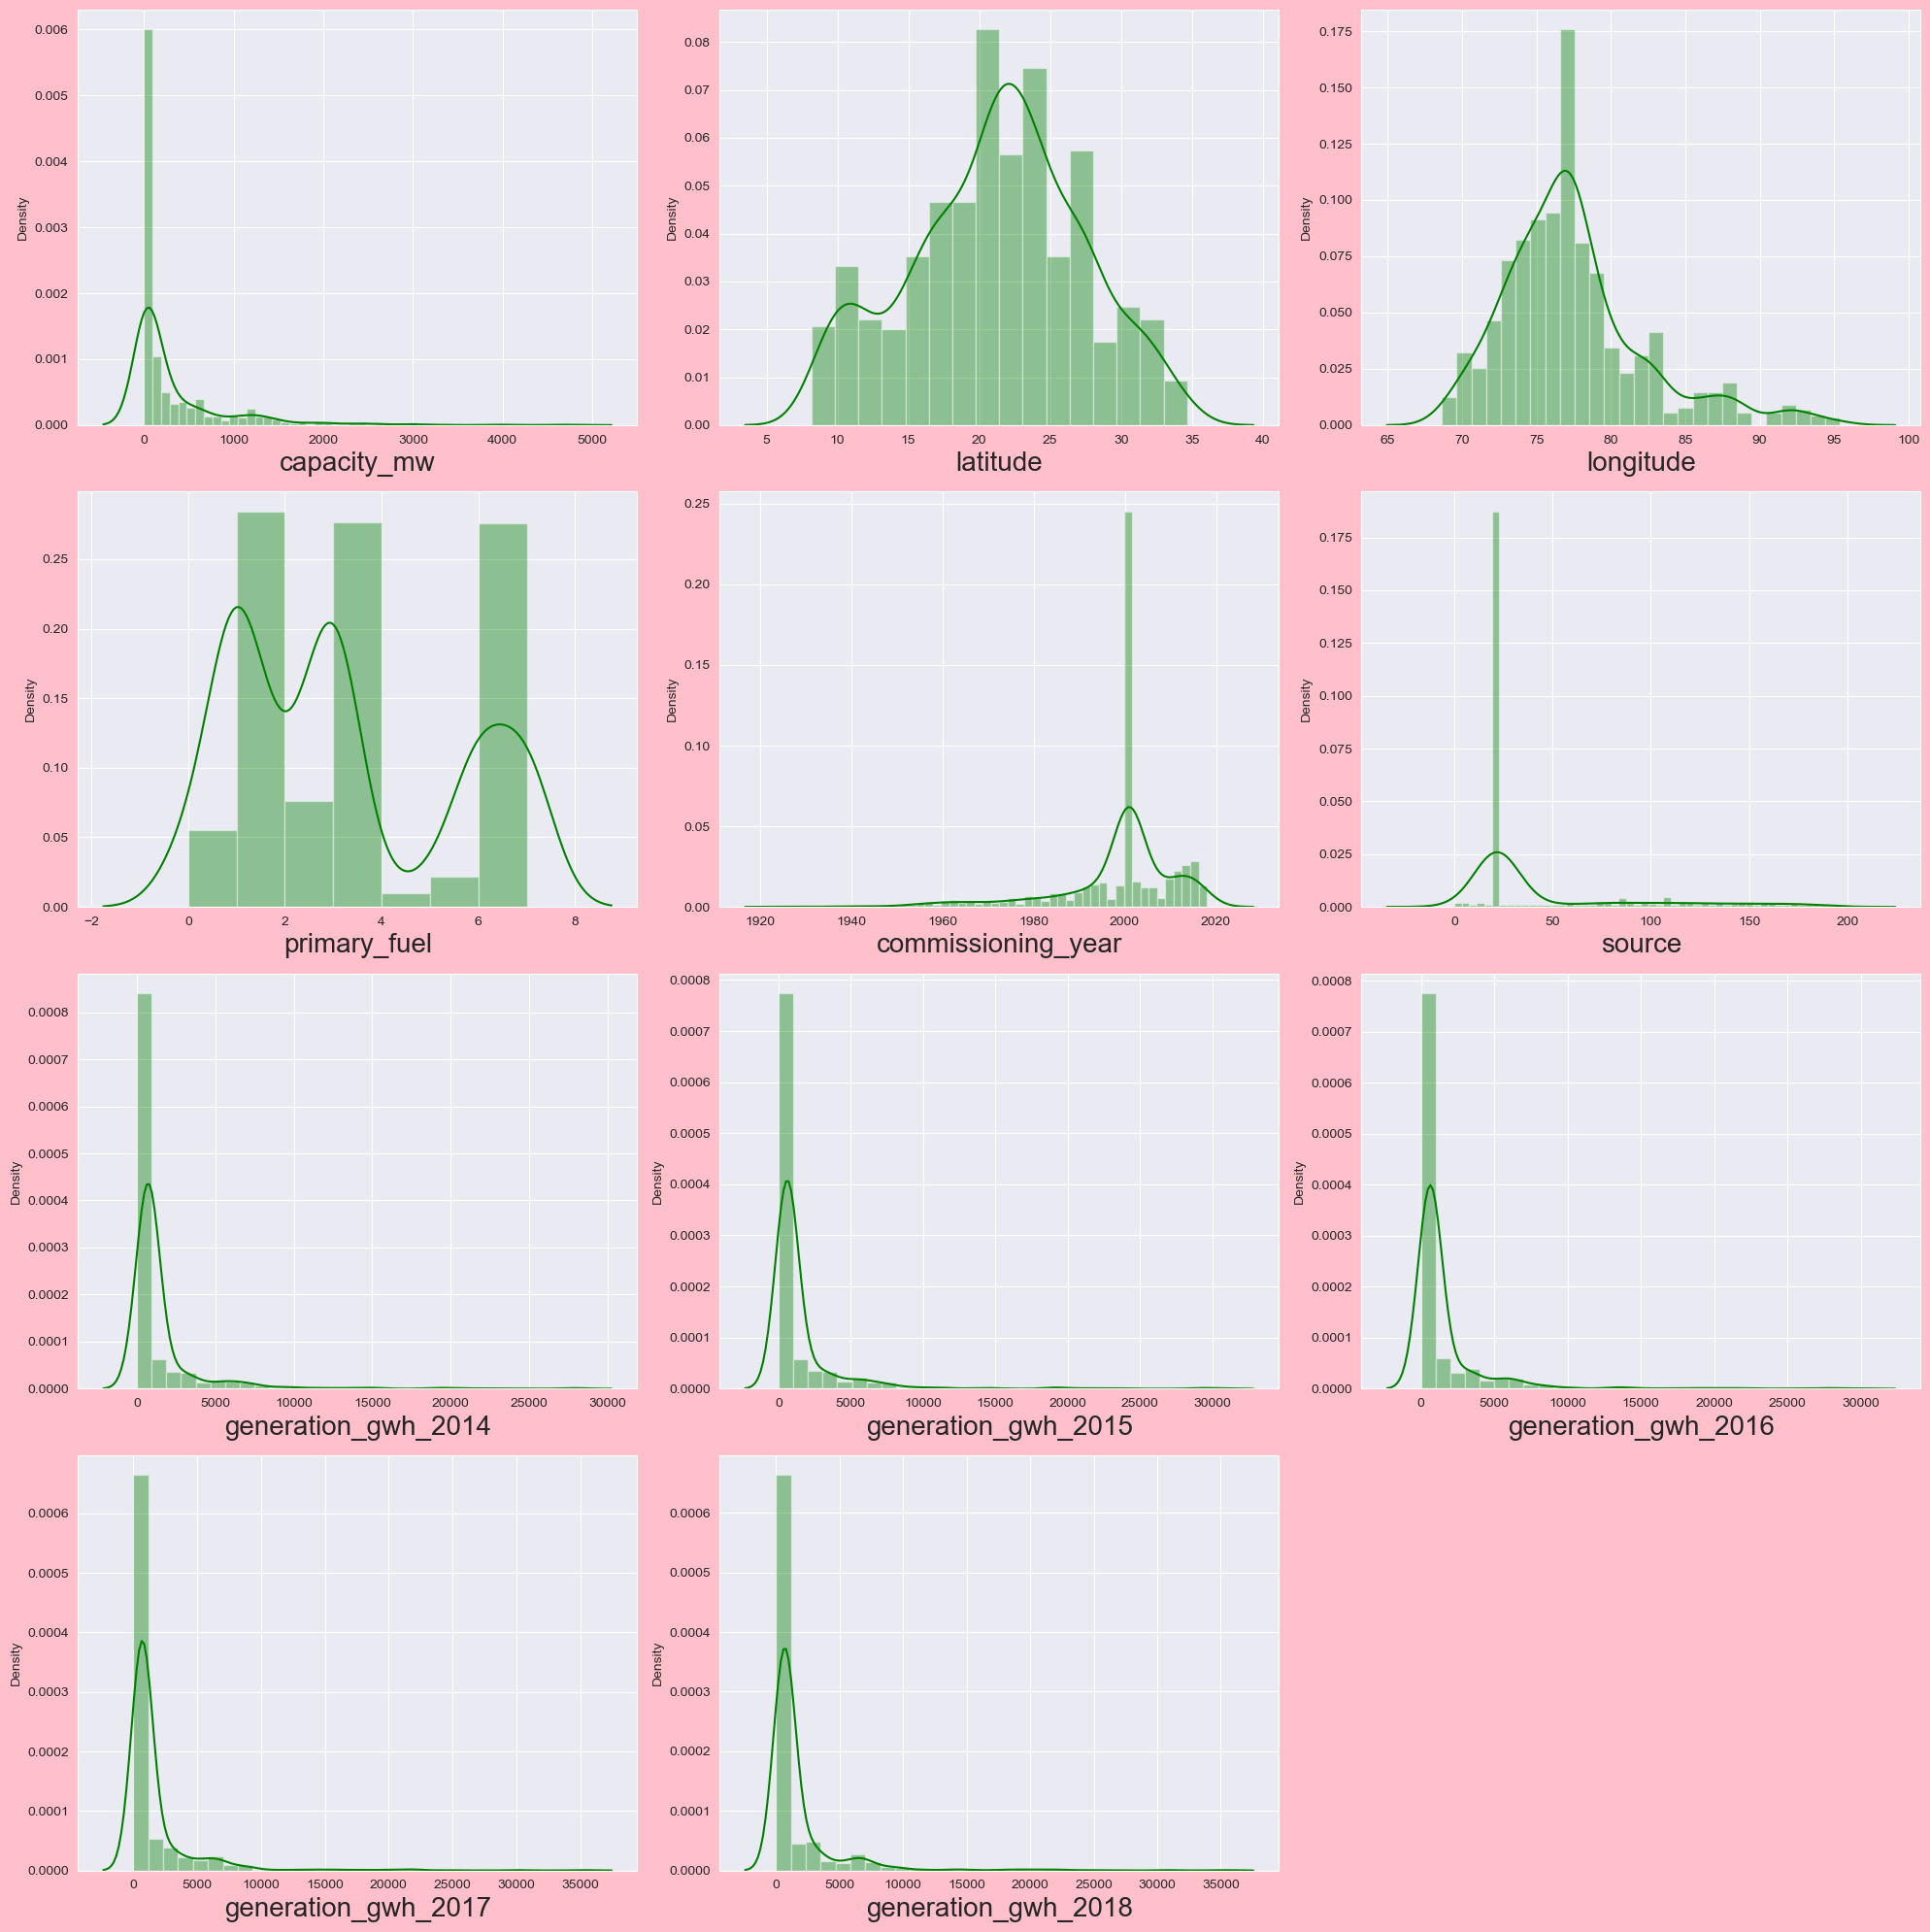

In [146]:
plt.figure(figsize=(20,20), facecolor='pink')
plot_number=1

for column in df:
    if plot_number <= 20:
        ax=plt.subplot(4,3, plot_number)
        sns.distplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)

    plot_number+=1

plt.show()

In [147]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.699495
source                 1.827373
generation_gwh_2014    5.312271
generation_gwh_2015    5.557765
generation_gwh_2016    5.273076
generation_gwh_2017    5.304061
generation_gwh_2018    5.130930
dtype: float64

In [158]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [161]:
df[skew] = pt.fit_transform(df[skew].values)
df.skew()

capacity_mw           -0.027658
latitude              -0.149698
longitude             -0.000854
primary_fuel           0.472251
commissioning_year    -1.699495
source                 1.827373
generation_gwh_2014   -0.026287
generation_gwh_2015   -0.032348
generation_gwh_2016   -0.025556
generation_gwh_2017   -0.012444
generation_gwh_2018   -0.022410
dtype: float64

<Axes: >

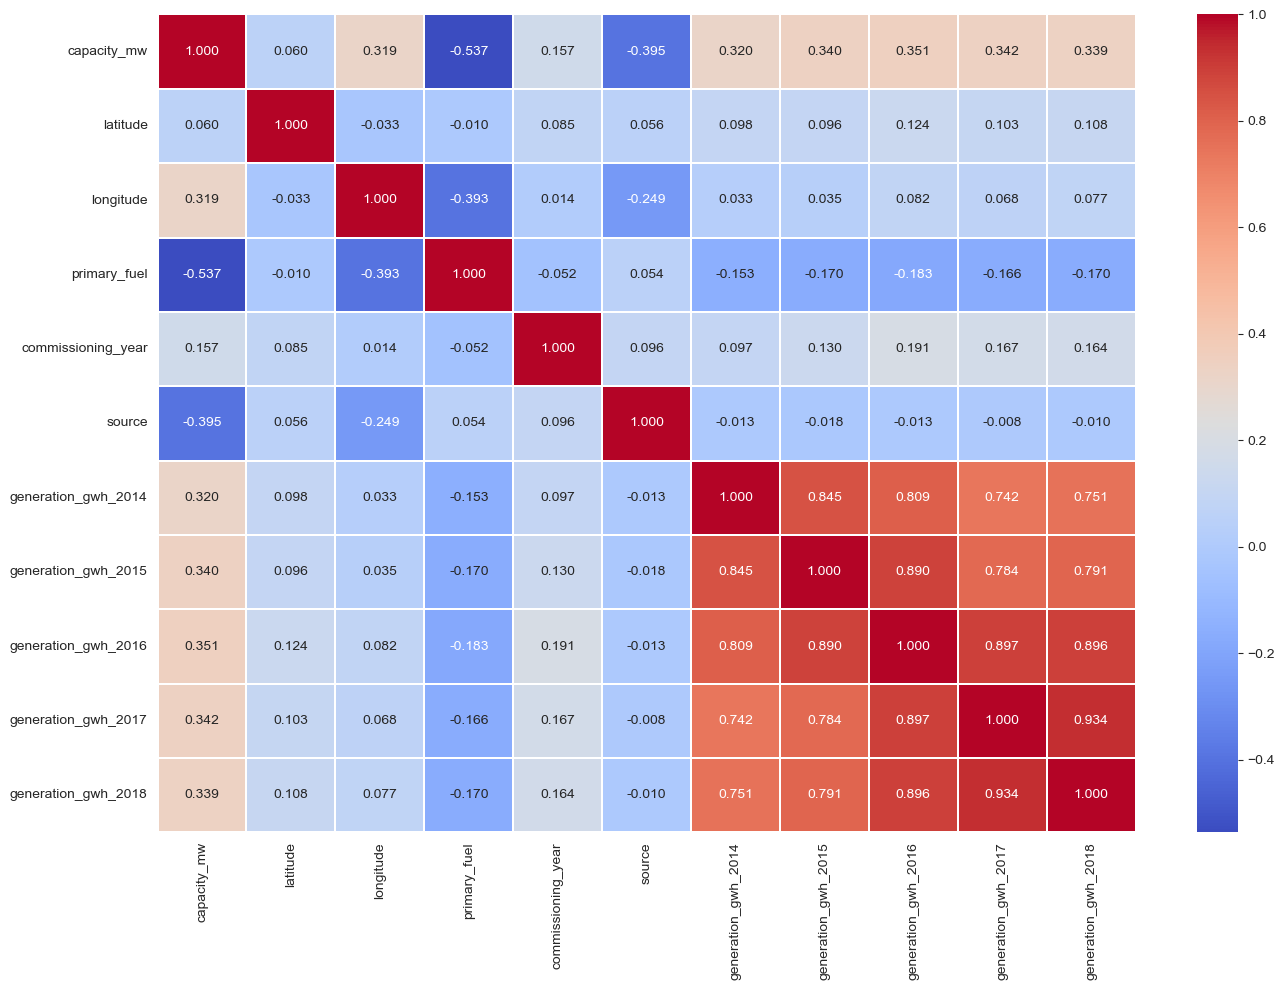

In [163]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr().T,linewidth=0.3,fmt='0.3f' ,annot=True, cmap= 'coolwarm')

- The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,
  generation_gwh_2015,generation_gwh_2014,generation_gwh_2018.
- capaity is negatively correlated with the features primary_fuel, source 

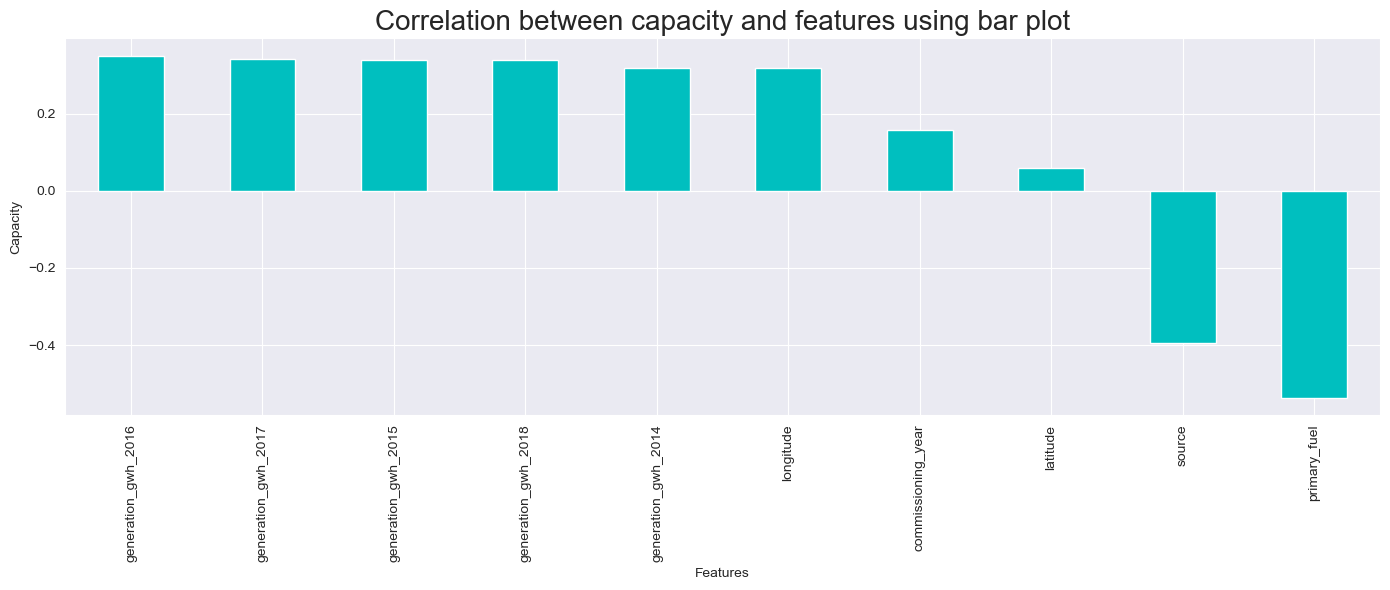

In [167]:
plt.figure(figsize=(14,6))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

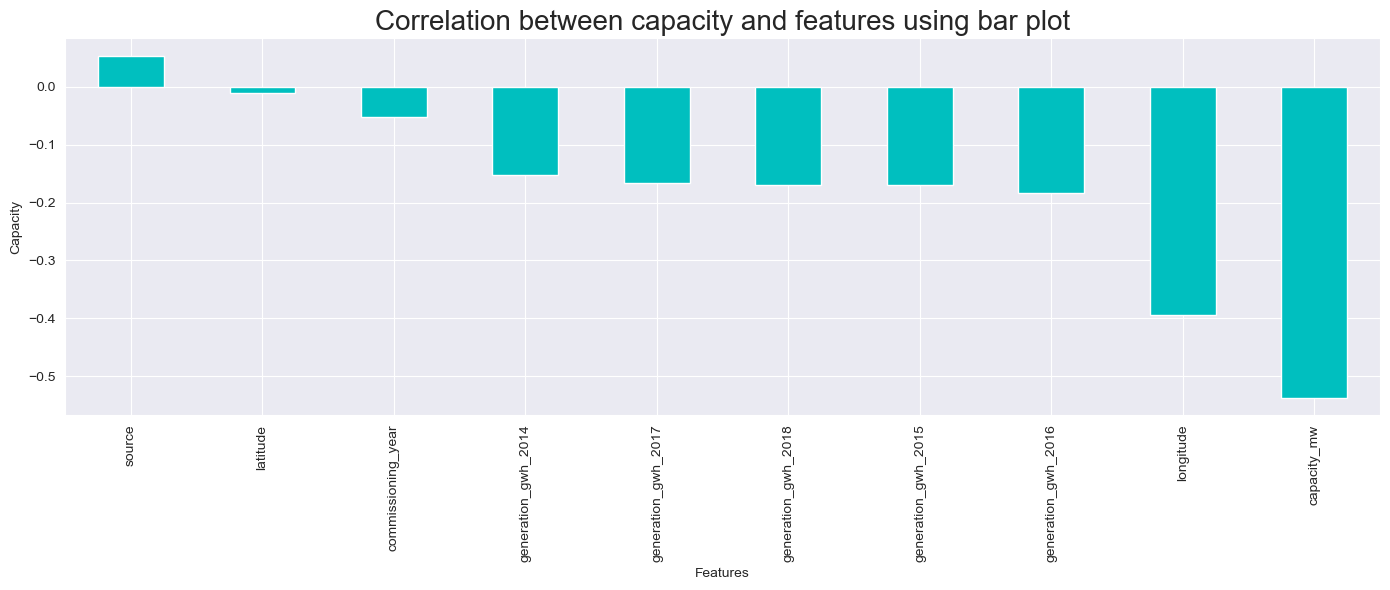

In [168]:
plt.figure(figsize=(14,6))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.844820,capacity_mw
1,4.894242,latitude
2,1.215913,longitude
3,3.802541,primary_fuel
4,2.355143,source
5,3.755454,generation_gwh_2014
6,4.465245,generation_gwh_2015
7,8.268434,generation_gwh_2017
8,8.576998,generation_gwh_2018


In [171]:
df.drop("commissioning_year",axis=1,inplace=True)

In [175]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.845588,capacity_mw
1,4.901153,latitude
2,1.221970,longitude
3,3.808326,primary_fuel
4,2.355171,source
5,3.776162,generation_gwh_2014
6,6.289260,generation_gwh_2015
7,10.405581,generation_gwh_2016
8,9.297764,generation_gwh_2017
9,9.152392,generation_gwh_2018


In [176]:
df.drop("generation_gwh_2016",axis=1,inplace=True)

In [177]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.844820,capacity_mw
1,4.894242,latitude
2,1.215913,longitude
3,3.802541,primary_fuel
4,2.355143,source
5,3.755454,generation_gwh_2014
6,4.465245,generation_gwh_2015
7,8.268434,generation_gwh_2017
8,8.576998,generation_gwh_2018


## Machine Learning Model Building

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [179]:
X = df.drop(['primary_fuel'], axis =1)
Y = df['primary_fuel']

In [214]:
X.shape

(907, 8)

In [215]:
Y.shape

(907,)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (634, 8)
Training target vector size: (634,)
Test feature matrix size: (273, 8)
Test target vector size: (273,)


In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6959706959706959 on Random_state 152


In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=152, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6959706959706959


Confusion matrix of Logistics Regression : 
 [[ 9  1  0  0  0  0  1  2]
 [ 1 63  2 10  0  0  0  1]
 [ 0  3  7  6  0  0  0  1]
 [ 0 14  0 51  0  0  0  8]
 [ 0  2  0  1  0  0  0  0]
 [ 1  1  0  1  0  2  0  0]
 [ 1  3  0  2  0  0 32  4]
 [ 0  0  0 16  0  0  1 26]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.72      0.82      0.77        77
           2       0.78      0.41      0.54        17
           3       0.59      0.70      0.64        73
           4       0.00      0.00      0.00         3
           5       1.00      0.40      0.57         5
           6       0.94      0.76      0.84        42
           7       0.62      0.60      0.61        43

    accuracy                           0.70       273
   macro avg       0.67      0.55      0.59       

### Decision Tree Classifier

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=152, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.8058608058608059


Confusion matrix of DecisionTreeClassifier : 
 [[ 9  3  1  0  0  0  0  0]
 [ 2 61  3  7  1  1  2  0]
 [ 0  5  5  4  0  3  0  0]
 [ 0  4  5 62  0  2  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  0  4  0  0]
 [ 1  5  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 43]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.75      0.79      0.77        77
           2       0.33      0.29      0.31        17
           3       0.85      0.85      0.85        73
           4       0.00      0.00      0.00         3
           5       0.40      0.80      0.53         5
           6       0.95      0.86      0.90        42
           7       1.00      1.00      1.00        43

    accuracy                           0.81       273
   macro avg       0.63      0.66      0.6

### Random Forest Classifier

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=152, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8644688644688645


Confusion matrix of RandomForestClassifier : 
 [[11  1  0  0  0  0  1  0]
 [ 1 66  1  9  0  0  0  0]
 [ 0  7  6  2  0  2  0  0]
 [ 0  2  0 70  0  1  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  2  1  0  0  2  0  0]
 [ 0  4  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 43]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.79      0.86      0.82        77
           2       0.67      0.35      0.46        17
           3       0.86      0.96      0.91        73
           4       0.00      0.00      0.00         3
           5       0.40      0.40      0.40         5
           6       0.97      0.90      0.94        42
           7       1.00      1.00      1.00        43

    accuracy                           0.86       273
   macro avg       0.70      0.66      0.6

### KNeighbors Classifier

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=152, test_size=.3)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print('\033[1m'+'KneighborsClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KneighborsClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of KneighborsClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of KneighborsClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

KneighborsClassifier Evaluation


Accuracy Score of KneighborsClassifier : 0.7252747252747253


Confusion matrix of KneighborsClassifier : 
 [[12  0  0  1  0  0  0  0]
 [ 2 61  2  8  0  0  1  3]
 [ 1  5  4  4  0  2  0  1]
 [ 0  6  1 57  0  0  0  9]
 [ 0  2  1  0  0  0  0  0]
 [ 0  3  1  1  0  0  0  0]
 [ 2  3  0  3  0  0 33  1]
 [ 1  2  0  7  0  0  2 31]]


classification Report of KneighborsClassifier 
               precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.74      0.79      0.77        77
           2       0.44      0.24      0.31        17
           3       0.70      0.78      0.74        73
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.92      0.79      0.85        42
           7       0.69      0.72      0.70        43

    accuracy                           0.73       273
   macro avg       0.52      0.53      0.52       

In [199]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        KNeighborsClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.60989011 0.63186813 0.62430939 0.61325967 0.60773481]
Mean Score : 0.6174124218323114
Std deviation : 0.009208936170100912




Cross Validation Score DecisionTreeClassifier() :

Score : [0.75824176 0.76373626 0.8121547  0.73480663 0.72375691]
Mean Score : 0.7585392508044441
Std deviation : 0.030576992088181987




Cross Validation Score RandomForestClassifier() :

Score : [0.77472527 0.80769231 0.86740331 0.80110497 0.8121547 ]
Mean Score : 0.8126161131685994
Std deviation : 0.030312757188271894




Cross Validation Score KNeighborsClassifier() :

Score : [0.69230769 0.7032967  0.70718232 0.64640884 0.70718232]
Mean Score : 0.6912755752534758
Std deviation : 0.023085258595761646




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

### Hyper Parameter Tuning : GridSearchCV

In [200]:
from sklearn.model_selection import GridSearchCV


In [201]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [202]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.701 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.685 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.677 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.709 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [204]:

GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

In [208]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8754578754578755


In [209]:
prediction=pd.DataFrame({'predicted values':y_pred,'actual values':Y_test})
prediction

,predicted values,actual values
110,1,1
653,3,1
259,3,2
635,1,2
767,1,1
...,...,...
851,7,7
546,3,3
288,1,1
823,7,7


In [210]:
import joblib
joblib.dump(Final_model,'Globl_Powerplant_primary_fuel.pkl')

['Globl_Powerplant_primary_fuel.pkl']

## Machine learning model for capacity_mw

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [211]:
df1 = df.copy()


In [212]:
df1.shape

(907, 9)

In [213]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.724867,28.1839,-0.952559,6,109,-0.025398,-0.035907,-0.020208,-0.028634
1,0.209512,24.7663,-0.544554,1,174,-0.025398,-0.035907,-0.020208,-0.028634
2,-0.277518,21.9038,-2.382541,7,21,-0.025398,-0.035907,-0.020208,-0.028634
3,0.374957,23.8712,2.172275,2,22,-0.217878,0.103405,-0.167205,-0.194424
4,1.624132,21.9603,1.116998,1,22,1.146834,1.790820,1.587464,1.858963


In [216]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,1.844820,capacity_mw
1,4.894242,latitude
2,1.215913,longitude
3,3.802541,primary_fuel
4,2.355143,source
5,3.755454,generation_gwh_2014
6,4.465245,generation_gwh_2015
7,8.268434,generation_gwh_2017
8,8.576998,generation_gwh_2018


In [218]:
X = df1.drop(['capacity_mw'], axis =1)
Y = df1['capacity_mw']

In [219]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=152, test_size=.20)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (725, 8)
Training target vector size: (725,)
Test feature matrix size: (182, 8)
Test target vector size: (182,)


In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.612299950922566 on Random_state 92


#### Linear Regression

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=92, test_size=.20)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual:'+'\033[0m\n',Y_test)

Predicted:
 [-0.55029034 -0.17252086  0.33590865 -0.34574427  1.07146272  0.50503848
  0.45088246 -0.25703424 -0.55280501  0.55700339 -0.60958666  0.06870316
  1.50865455 -0.04496015  0.8855938   0.99071181 -1.57568128  0.66250603
  1.60908935 -0.60528029 -0.97883997 -0.06301121  1.00676117 -0.89098419
  0.94334348 -0.41227964 -0.65009817 -0.61119639 -0.68649055 -1.05402938
  0.16551163  0.06164095  0.76070576  1.15606355 -0.32221384 -0.25457142
 -0.61176389 -0.74172652 -0.10334791  0.77112282 -0.12942685 -0.49774285
 -0.2708679  -0.91324809  0.14200264 -1.09257142  0.70120207 -0.13526031
 -1.20017023 -0.87333206  0.20207083 -0.03534245 -0.60317472  1.56527099
  1.15663661  0.53751924 -0.66782441 -0.25151468  0.16349883  0.6875123
 -0.61447736 -0.89089932  0.4345595   0.44613023 -0.62590176  0.3960751
 -1.58838881  0.88470208  0.10337659 -0.61692947  1.52535146 -0.55607087
 -0.60403558  0.32732226 -0.28919205  0.40967444  0.16082241  0.96119334
  0.35745842  0.25290001 -0.51678225 -1.0

In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.5218166220487168
Mean squared error : 0.4328771782411878
Root Mean Squared Error: 0.6579340227113869


 R2 Score :
0.612299950922566


In [228]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

In [234]:
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

model = [RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

In [237]:
  for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print("-" * 50)

Model: RandomForestRegressor()
R-squared (Train): 0.9588688009817576
R-squared (Test): 0.8416043241805315
Mean Squared Error (MSE): 0.1768528875802207
Mean Absolute Error (MAE): 0.296113581082349
--------------------------------------------------
Model: GradientBoostingRegressor()
R-squared (Train): 0.8852164833638387
R-squared (Test): 0.8487921237302627
Mean Squared Error (MSE): 0.16882752262539316
Mean Absolute Error (MAE): 0.2921898118951543
--------------------------------------------------
Model: AdaBoostRegressor()
R-squared (Train): 0.7649718408712459
R-squared (Test): 0.8080917503146776
Mean Squared Error (MSE): 0.21427054704446494
Mean Absolute Error (MAE): 0.36042723677684196
--------------------------------------------------
Model: BaggingRegressor()
R-squared (Train): 0.94591953882245
R-squared (Test): 0.847510511678643
Mean Squared Error (MSE): 0.17025847578060999
Mean Absolute Error (MAE): 0.29127809362585355
--------------------------------------------------
Model: Decis

In [238]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('-' * 50)

Model: RandomForestRegressor()
R-squared (Test): 0.8522826246049722
Cross-validation R-squared: 0.7755581888792875
--------------------------------------------------
Model: GradientBoostingRegressor()
R-squared (Test): 0.8489778856781853
Cross-validation R-squared: 0.7771035383512856
--------------------------------------------------
Model: AdaBoostRegressor()
R-squared (Test): 0.8015551239830014
Cross-validation R-squared: 0.7462898563995631
--------------------------------------------------
Model: BaggingRegressor()
R-squared (Test): 0.816514474647618
Cross-validation R-squared: 0.7560572441794843
--------------------------------------------------
Model: DecisionTreeRegressor()
R-squared (Test): 0.743874730133856
Cross-validation R-squared: 0.6161205531395882
--------------------------------------------------
Model: KNeighborsRegressor()
R-squared (Test): 0.6832468792497146
Cross-validation R-squared: 0.6061360005813009
--------------------------------------------------


In [239]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [240]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [241]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=50)

In [242]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [243]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.8573916639912382

### Saving the model 

In [245]:
joblib.dump(grid_search.best_estimator_,"GPPD_capacity_mw.pkl")

['GPPD_capacity_mw.pkl']